<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Masculinity in the Time of #MeToo 

_Author:_ Tha Vin (Capstone Project March 2019)

---


### Hypothesis
Men in the workplace are adjusting their behavior in work, home and society due to the visibility of the #MeToo movement. I predict age and other demographics influence male perceptions, observations, behavior, and attitudes (POBA). The POBA methodology will identify segments of the male population and paint picture of the impact of #MeToo on the male behaviors:
- Identify segments in male population
- Describe the impact of #MeToo
- Develop attributes for males relative to #MeToo

### Data Guide

- [Link](#why_data_viz)
- [Link](#anscombe)

The raw data contains all 1,615 responses to the survey including the weights for each response. Responses to open-ended questions have been omitted, including those where a respondent explained what they meant by selecting the "other" option in response to a question.


### Part 1: Import Data


In [106]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

#increase default figure size for 

survey = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv')
survey.head(1615)

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
5,6,5/10/18 8:25,5/10/18 8:34,Very masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,Post graduate degree,65 and up,Has children,Straight,0.059087
6,7,5/10/18 8:29,5/10/18 8:41,Somewhat masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Friends,...,West North Central,Windows Desktop / Laptop,Non-white,Other,College or more,Post graduate degree,18 - 34,Has children,Gay/Bisexual,0.257360
7,8,5/10/18 10:04,5/10/18 10:11,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Pop culture,Friends,...,Middle Atlantic,Windows Desktop / Laptop,White,White,College or more,College or more,65 and up,No children,Straight,0.656490
8,9,5/10/18 11:00,5/10/18 11:07,Very masculine,Not at all important,Father or father figure(s),Not selected,Not selected,Not selected,Friends,...,Pacific,iOS Phone / Tablet,Non-white,Hispanic,Some college,Some college,35 - 64,Has children,Straight,4.341850
9,10,5/11/18 12:36,5/11/18 12:43,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Pop culture,Not selected,...,Pacific,iOS Phone / Tablet,White,White,College or more,Post graduate degree,35 - 64,No children,Straight,0.057482


In [2]:
survey.rename(columns={'Unnamed: 0':'RespondentID'}, inplace=True)

In [3]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 98 columns):
RespondentID    1615 non-null int64
StartDate       1615 non-null object
EndDate         1615 non-null object
q0001           1615 non-null object
q0002           1615 non-null object
q0004_0001      1615 non-null object
q0004_0002      1615 non-null object
q0004_0003      1615 non-null object
q0004_0004      1615 non-null object
q0004_0005      1615 non-null object
q0004_0006      1615 non-null object
q0005           1615 non-null object
q0007_0001      1615 non-null object
q0007_0002      1615 non-null object
q0007_0003      1615 non-null object
q0007_0004      1615 non-null object
q0007_0005      1615 non-null object
q0007_0006      1615 non-null object
q0007_0007      1615 non-null object
q0007_0008      1615 non-null object
q0007_0009      1615 non-null object
q0007_0010      1615 non-null object
q0007_0011      1615 non-null object
q0008_0001      1615 non-null object
q0008_

In [4]:
survey.index

RangeIndex(start=0, stop=1615, step=1)

In [5]:
print(survey.index.name)

None


In [6]:
survey.set_index('RespondentID', inplace=True)

In [7]:
print(survey.index.name)

RespondentID


In [8]:
survey.shape

(1615, 97)

In [9]:
survey.columns

Index(['StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001', 'q0004_0002',
       'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006', 'q0005',
       'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004', 'q0007_0005',
       'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009', 'q0007_0010',
       'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003', 'q0008_0004',
       'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008', 'q0008_0009',
       'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009', 'q0010_0001',
       'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005', 'q0010_0006',
       'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002', 'q0011_0003',
       'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002', 'q0012_0003',
       'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007', 'q0013',
       'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
       'q0020_0001',

In [10]:
survey.head()

,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
RespondentID,,,,,,,,,,,,,,,,,,,,,
1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400


### Part 2: Explore Data

In [11]:
survey.rename(columns={'q0005': 'Q5: Societal pressure?'}, inplace=True)

In [12]:
survey.rename(columns={'q0007_0001': 'Q7: Ask friend for professional advice?'},inplace=True)
                       #'q0007_0002’:'Q7: Ask friend for personal advice?', 
                       #'q0007_0003’:'Q7: Express affection to guys?','q0007_0004’:'Q7: Cry?',
                       #'q0007_0005’: 'Q7: Fight?','q0007_0006’: 'Q7: Sexual relations with woman?','q0007_0007’: 'Q7: Sexual relations with man','q0007_0008’: 'Q7: Watch sports?','q0007_0009’: 'Q7: Workout?','q0007_0010’: 'Q7: See therapist?','q0007_0011’: 'Q7: Feel lonely?'}, inplace=True)


In [13]:
survey.rename(columns={'q0007_0002' : 'Q7: Ask friend for personal advice?'}, inplace =True)

In [14]:
survey.rename(columns={'q0007_0003': 'Q7: Express affection to guys?','q0007_0004': 'Q7: Cry?','q0007_0005': 'Q7: Fight?','q0007_0006': 'Q7: Sexual relations with woman?','q0007_0007': 'Q7: Sexual relations with man','q0007_0008': 'Q7: Watch sports?','q0007_0009': 'Q7: Workout?','q0007_0010': 'Q7: See therapist?','q0007_0011': 'Q7: Feel lonely?'},inplace=True)

In [15]:
survey.rename(columns={'q0008_0001' : 'Q8: Worry daily about height','q0008_0002' : 'Q8: Worry daily about weight','q0008_0003' : 'Q8: Worry daily about hair'}, inplace=True)


In [16]:
survey.rename(columns={'q0008_0004' : 'Q8: Worry daily about body','q0008_0005' : 'Q8: Worry daily about genitalia','q0008_0007' : 'Q8: Worry daily about quality or quantity of sex','q0008_0006' : 'Q8: Worry daily about clothing','q0008_0008' : 'Q8: Worry daily about mental health',},inplace=True)

In [17]:
survey.rename(columns={'q0008_0009' : 'Q8: Worry daily about physical health','q0008_0010' : 'Q8: Worry daily about finances','q0008_0011' : 'Q8: Worry daily about family','q0008_0012' : 'Q8: Worry daily about none above'},inplace=True)

In [18]:
survey.rename(columns={'q0009' : 'Q9: Employment status'}, inplace=True)

In [19]:
survey.rename(columns={'q0010_0001' : 'Q10: Money advantage','q0010_0001' : 'Q10: Money advantage','q0010_0002' : 'Q10: Taken seriously advantage','q0010_0003' : 'Q10: Choice advantage','q0010_0004' : 'Q10: Promotion advantage','q0010_0005' : 'Q10: Explicit praise advantage','q0010_0006' : 'Q10: Manager support advantage','q0010_0007' : 'Q10: Other advantage','q0010_0008' : 'Q10: None above advantage',}, inplace=True)

In [20]:
survey.rename(columns={'q0011_0001' : 'Q11: Confront accused','q0011_0002' : 'Q11: Contacted HR','q0011_0003' : 'Q11: Contacted mgr of accused','q0011_0004' : 'Q11: Supported victim','q0011_0005' : 'Q11: Did not respond','q0011_0006' : 'Q11: Never witnessed','q0011_0007' : 'Q11: Other'}, inplace=True)

In [21]:
survey.rename(columns={'q0012_0001' : 'Q12: Confront accused','q0012_0002' : 'Q12: Contacted HR','q0012_0003' : 'Q12: Contacted mgr of accused','q0012_0004' : 'Q12: Supported victim','q0012_0005' : 'Q12: Did not respond','q0012_0006' : 'Q12: Never witnessed','q0012_0007' : 'Q12: Other'}, inplace=True)

In [22]:
survey.rename(columns={'Q11: Confront accused': 'Q11: Hiring disadvantage','Q11: Contacted HR':'Q11: Accused of sex harassment disadvantage','Q11: Contacted mgr of accused':'Q11: Other','Q11: Supported victim':'Q11: None above'}, inplace=True)

In [23]:
survey.rename(columns={'q0013':'Q13: Main reason you did not respond to sexual harassment','q0014':'Heard of #MeToo','q0015':'Think about behavior in wake of #MeToo','q0017':'Expected to make first move','q0018':'Pays on date'},inplace=True)

In [24]:
survey.rename(columns={'q0019_0001' : 'Q19: Pay-Right thing','q0019_0002' : 'Q19: Pay-Make more money','q0019_0003' : 'Q19: Pay-Feels good','q0019_0004' : 'Q19: Pay-Societal expectations','q0019_0005' : 'Q19: Pay-You asked out','q0019_0006' : 'Q19: Pay-Test','q0019_0007' : 'Q19: Pay-Other'}, inplace=True)

In [25]:
survey.rename(columns={'q0020_0001' : 'Q20: Gauge interest by reading body language','q0020_0002' : 'Q20: Gauge interest by asking for verbal consent','q0020_0003' : 'Q20: Gauge interest by making physical move to see reaction','q0020_0005' : 'Q20: Not clear how to gauge interest','q0020_0004' : 'Q20: Every situtation is different','q0020_0006' : 'Q20: Other'}, inplace=True)

In [26]:
survey.rename(columns={'Heard of #MeToo':'Q14: Heard of #MeToo'},inplace=True)

In [27]:
survey.rename(columns={'Think about behavior in wake of #MeToo':'Q15: Think about work behavior in wake of #MeToo'},inplace=True)

In [28]:
survey.rename(columns={'Expected to make first move':'Q17: Expected to make first move'},inplace=True)

In [29]:
survey.rename(columns={'Pays on date':'Q18: Pays on date'},inplace=True)

In [30]:
survey.rename(columns={'q0001':'Q1: Feel manly', 'q0002':'Q2: Others see you as manly'},inplace=True)

In [31]:
survey.rename(columns={'q0004_0001':'Q4: Ideas re: manhood from father', 'q0004_0002':'Q4: Ideas re: manhood from mother','q0004_0003':'Q4: Ideas re: manhood from family','q0004_0004':'Q4: Ideas re: manhood from pop culture','q0004_0005':'Q4: Ideas re: manhood from friends','q0004_0006':'Q4: Ideas re: manhood from other'},inplace=True)

In [32]:
survey.rename(columns={'q0007_0001':'Q7: How often ask...'},inplace=True)

In [33]:
survey.rename(columns={'q0021_0001':'21: Pushed too far sexually in last 12 months'},inplace=True)

In [34]:
survey.rename(columns={'q0021_0002':'21: Talked with a friend about about whether I pushed too far','q0021_0003':'21: Contacted past partner about whether I pushed too far','q0021_0004':'21: None above'},inplace=True)

In [35]:
survey.rename(columns={'21: Pushed too far sexually in last 12 months':'21: Wondered about pushing too far sexually'},inplace=True)

In [36]:
survey.rename(columns={'q0022':'22: Changed romantic behavior in #MeToo wake'},inplace=True)

In [37]:
survey.rename(columns={'q0024':'24: Marriage status'},inplace=True)

In [38]:
survey.rename(columns={'q0025_0001':'25: Kids under 18','q0025_0002':'25: Kids over 18','q0025_0003':'25: No kids'},inplace=True)

In [39]:
survey.rename(columns={'q0026':'26: Sexual orientation','q0028':'28: Race','q0029':'29: Last grade finished'},inplace=True)

In [40]:
survey.rename(columns={'q0030':'State'},inplace=True)

In [41]:
survey.rename(columns={'q0035':'Q35: Region', 'q0036':'Q36: Device'},inplace=True)

In [42]:
survey.rename(columns={'q0034':'Q34: Income'},inplace=True)

In [44]:
survey.columns

Index(['StartDate', 'EndDate', 'Q1: Feel manly', 'Q2: Others see you as manly',
       'Q4: Ideas re: manhood from father',
       'Q4: Ideas re: manhood from mother',
       'Q4: Ideas re: manhood from family',
       'Q4: Ideas re: manhood from pop culture',
       'Q4: Ideas re: manhood from friends',
       'Q4: Ideas re: manhood from other', 'Q5: Societal pressure?',
       'Q7: Ask friend for professional advice?',
       'Q7: Ask friend for personal advice?', 'Q7: Express affection to guys?',
       'Q7: Cry?', 'Q7: Fight?', 'Q7: Sexual relations with woman?',
       'Q7: Sexual relations with man', 'Q7: Watch sports?', 'Q7: Workout?',
       'Q7: See therapist?', 'Q7: Feel lonely?',
       'Q8: Worry daily about height', 'Q8: Worry daily about weight',
       'Q8: Worry daily about hair', 'Q8: Worry daily about body',
       'Q8: Worry daily about genitalia', 'Q8: Worry daily about clothing',
       'Q8: Worry daily about quality or quantity of sex',
       'Q8: Worry daily abo

In [45]:
pd.DataFrame(survey.dtypes, columns=['DataType'])

,DataType
StartDate,object
EndDate,object
Q1: Feel manly,object
Q2: Others see you as manly,object
Q4: Ideas re: manhood from father,object
Q4: Ideas re: manhood from mother,object
Q4: Ideas re: manhood from family,object
Q4: Ideas re: manhood from pop culture,object
Q4: Ideas re: manhood from friends,object
Q4: Ideas re: manhood from other,object


In [46]:
survey.columns

Index(['StartDate', 'EndDate', 'Q1: Feel manly', 'Q2: Others see you as manly',
       'Q4: Ideas re: manhood from father',
       'Q4: Ideas re: manhood from mother',
       'Q4: Ideas re: manhood from family',
       'Q4: Ideas re: manhood from pop culture',
       'Q4: Ideas re: manhood from friends',
       'Q4: Ideas re: manhood from other', 'Q5: Societal pressure?',
       'Q7: Ask friend for professional advice?',
       'Q7: Ask friend for personal advice?', 'Q7: Express affection to guys?',
       'Q7: Cry?', 'Q7: Fight?', 'Q7: Sexual relations with woman?',
       'Q7: Sexual relations with man', 'Q7: Watch sports?', 'Q7: Workout?',
       'Q7: See therapist?', 'Q7: Feel lonely?',
       'Q8: Worry daily about height', 'Q8: Worry daily about weight',
       'Q8: Worry daily about hair', 'Q8: Worry daily about body',
       'Q8: Worry daily about genitalia', 'Q8: Worry daily about clothing',
       'Q8: Worry daily about quality or quantity of sex',
       'Q8: Worry daily abo

In [47]:
survey.head()

,StartDate,EndDate,Q1: Feel manly,Q2: Others see you as manly,Q4: Ideas re: manhood from father,Q4: Ideas re: manhood from mother,Q4: Ideas re: manhood from family,Q4: Ideas re: manhood from pop culture,Q4: Ideas re: manhood from friends,Q4: Ideas re: manhood from other,...,Q35: Region,Q36: Device,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
RespondentID,,,,,,,,,,,,,,,,,,,,,
1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400


Trying to figure out what is "q0034"

### Part 2: Clean Data

In [10]:
#identify nulls

In [54]:
null_df = pd.DataFrame(survey.isnull().sum(), columns=['Count of Nulls'])
null_df.index.name='Column'
null_df.sort_values(['Count of Nulls'], ascending=False).head(2000)


,Count of Nulls
Column,
Q13: Main reason you did not respond to sexual harassment,1566
Q15: Think about work behavior in wake of #MeToo,873
Q12: Confront accused,735
Q11: Accused of sex harassment disadvantage,735
Q10: Money advantage,735
Q10: Taken seriously advantage,735
Q10: Choice advantage,735
Q10: Promotion advantage,735
Q10: Explicit praise advantage,735


### Part 4: Understand Data

In [195]:
survey[['Q15: Think about work behavior in wake of #MeToo', '22: Changed romantic behavior in #MeToo wake']].describe() #these are the #MeToo questions

,Q15: Think about work behavior in wake of #MeToo,22: Changed romantic behavior in #MeToo wake
count,742,1615
unique,3,3
top,No,No
freq,489,1442


In [198]:
survey['Q15: Think about work behavior in wake of #MeToo'].value_counts() #these are the #MeToo questions

No           489
Yes          247
No answer      6
Name: Q15: Think about work behavior in wake of #MeToo, dtype: int64

In [200]:
 survey['22: Changed romantic behavior in #MeToo wake'].value_counts()#these are the #MeToo questions

No           1442
Yes           144
No answer      29
Name: 22: Changed romantic behavior in #MeToo wake, dtype: int64

In [55]:
#groupby changed romantic behavior
survey.groupby(['22: Changed romantic behavior in #MeToo wake']).count()

Column,StartDate,EndDate,Q1: Feel manly,Q2: Others see you as manly,Q4: Ideas re: manhood from father,Q4: Ideas re: manhood from mother,Q4: Ideas re: manhood from family,Q4: Ideas re: manhood from pop culture,Q4: Ideas re: manhood from friends,Q4: Ideas re: manhood from other,...,Q35: Region,Q36: Device,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
22: Changed romantic behavior in #MeToo wake,,,,,,,,,,,,,,,,,,,,,
No,1442,1442,1442,1442,1442,1442,1442,1442,1442,1442,...,1426,1441,1442,1442,1442,1442,1442,1436,1442,1442
No answer,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,26,29,29
Yes,144,144,144,144,144,144,144,144,144,144,...,140,143,144,144,144,144,144,144,144,144


In [56]:
#groupby Think about work behavior
survey.groupby(['Q15: Think about work behavior in wake of #MeToo']).count()

Column,StartDate,EndDate,Q1: Feel manly,Q2: Others see you as manly,Q4: Ideas re: manhood from father,Q4: Ideas re: manhood from mother,Q4: Ideas re: manhood from family,Q4: Ideas re: manhood from pop culture,Q4: Ideas re: manhood from friends,Q4: Ideas re: manhood from other,...,Q35: Region,Q36: Device,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
Q15: Think about work behavior in wake of #MeToo,,,,,,,,,,,,,,,,,,,,,
No,489,489,489,489,489,489,489,489,489,489,...,485,489,489,489,489,489,489,487,489,489
No answer,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Yes,247,247,247,247,247,247,247,247,247,247,...,245,247,247,247,247,247,247,246,247,247


In [57]:
survey['Q15: Think about work behavior in wake of #MeToo'].unique()

array([nan, 'No', 'Yes', 'No answer'], dtype=object)

In [59]:
def letter_to_digit(letter):
    letter_dict = {
        'No':0,
        'Yes':1,
        'No Answer':0
    }
    try:
        return letter_dict[letter]
    except KeyError:
        return 'N'

In [73]:
survey['Q15: Think about work behavior in wake of #MeToo'].apply(letter_to_digit)

RespondentID
1       N
2       N
3       0
4       N
5       1
6       0
7       N
8       N
9       0
10      0
11      0
12      N
13      N
14      N
15      N
16      N
17      0
18      0
19      0
20      N
21      N
22      0
23      1
24      1
25      N
26      1
27      N
28      N
29      N
30      N
       ..
1586    1
1587    0
1588    0
1589    N
1590    0
1591    N
1592    N
1593    1
1594    N
1595    0
1596    0
1597    N
1598    0
1599    0
1600    0
1601    0
1602    0
1603    0
1604    0
1605    N
1606    N
1607    N
1608    1
1609    1
1610    0
1611    1
1612    1
1613    1
1614    1
1615    N
Name: Q15: Think about work behavior in wake of #MeToo, Length: 1615, dtype: object

In [71]:
survey['Q15: Think about work behavior in wake of #MeToo'].unique()

array([nan, 'No', 'Yes', 'No answer'], dtype=object)

In [93]:
survey = survey.replace({'No':0, 'No answer':0, 'Yes':1, 'Very masculine':4,'Somewhat masculine':3,'Not very masculine':2,'Not at all masculine':1,'Very important':4,'Somewhat important':3,'Not too important':2,'Not at all important':1,'Often':5,'Sometimes':4,'Rarely':3,'Never, but open to it':2,'Never, but not open to it':1,'Employed, working full-time':6,'Employed, working part-time':5,'Not employed, student':4,'Not employed-retired':3,'Not employed, looking for work':2,'Not employed, NOT looking for work':1})

In [94]:
survey['Q15: Think about work behavior in wake of #MeToo'].unique()

array([nan,  0.,  1.])

In [95]:
survey['Q1: Feel manly'].unique()

array([3, 4, 1, 2, 0])

In [96]:
survey['Q9: Employment status'].unique()

array([1, 3, 6, 4, 5, 2, 0])

In [81]:
survey.shape

(1615, 97)

### Basic Analysis

In [109]:
survey.describe()

,Unnamed: 0,weight
count,1615.000000,1615.000000
mean,808.000000,1.000000
std,466.354658,1.438996
min,1.000000,0.019744
25%,404.500000,0.102580
50%,808.000000,0.596892
75%,1211.500000,1.010046
max,1615.000000,8.676606


In [104]:
survey.groupby('kids').agg(['count','mean']) 

Q1: Feel manly           Q2: Others see you as manly            \
                      count      mean                       count      mean   
kids                                                                          
Has children           1065  3.292019                        1065  2.522066   
No children             541  3.121996                         541  2.386322   

             Q5: Societal pressure?           Q9: Employment status            \
                              count      mean                 count      mean   
kids                                                                            
Has children                   1065  0.559624                  1065  4.432864   
No children                     541  0.656192                   541  4.290203   

             Q15: Think about work behavior in wake of #MeToo            \
                                                        count      mean   
kids                                                                      
Has children                                              488  0.325820   
No children                                               251  0.346614   

             Q17: Expected to make first move            \
                                        count      mean   
kids                                                      
Has children                             1065  0.628169   
No children                               541  0.634011   

             22: Changed romantic behavior in #MeToo wake           weight  \
                                                    count      mean  count   
kids                                                                         
Has children                                         1065  0.072300   1065   
No children                                           541  0.123845    541   

                        
                  mean  
kids                    
Has children  0.805406  
No children   1.382417

## Describing men who were influenced by MeToo

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplolib inline
sns.set(font_scale=1.5);

UsageError: Line magic function `%matplolib` not found.


In [126]:
#sns.lmplot(x='kids', y='Q1: Feel manly', data=survey);
survey.plot(kind='scatter', x='Q15: Think about work behavior in wake of #MeToo' , y='Q1: Feel manly');

KeyError: 'Q15: Think about work behavior in wake of #MeToo'

### Data Visualization

---

Because of the way the human brain processes information, charts or graphs that visualize large amounts of complex data are easier to understand than spreadsheets or reports. 

Data visualization is a quick, easy way to convey concepts in a universal  manner — and you can experiment with different scenarios by making slight adjustments.

Here's a helpful overview of the importance of data visualization:

[SAS: Data Visualization](http://www.sas.com/en_us/insights/big-data/data-visualization.html)

In [107]:
survey.kids.value_counts()

Has children    1065
No children      541
Name: kids, dtype: int64

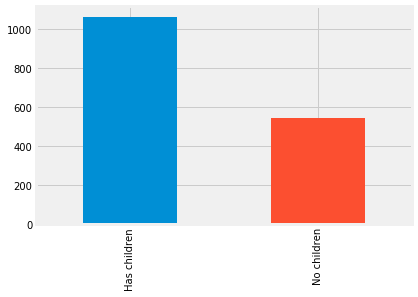

In [108]:
survey.kids.value_counts().plot(kind='bar');